In [68]:
#from notebook.services.config import ConfigManager; ConfigManager().update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
#import numpy as np
#from scipy.stats import uniform
#from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [92]:
df = pd.read_csv("./data/gdp.csv")

In [70]:
df.describe()
df.head(5)

,Entity,Code,Year,GDP (constant 2010 US$)
0,Afghanistan,AFG,2002,8.013233e+09
1,Afghanistan,AFG,2003,8.689884e+09
2,Afghanistan,AFG,2004,8.781610e+09
3,Afghanistan,AFG,2005,9.762979e+09
4,Afghanistan,AFG,2006,1.030523e+10


In [93]:
df["gdp"] = df["GDP (constant 2010 US$)"]/1e9
df.head(5)

,Entity,Code,Year,GDP (constant 2010 US$),gdp
0,Afghanistan,AFG,2002,8.013233e+09,8.013233
1,Afghanistan,AFG,2003,8.689884e+09,8.689884
2,Afghanistan,AFG,2004,8.781610e+09,8.781610
3,Afghanistan,AFG,2005,9.762979e+09,9.762979
4,Afghanistan,AFG,2006,1.030523e+10,10.305228


In [72]:
np.sum(df.query('Year == 1960')["gdp"])

9025.834854426508

In [73]:
df.groupby("Year").agg(sum)[["gdp"]]
px.line(df.groupby("Year").agg(sum)[["gdp"]])

In [74]:
px.line(df.groupby("Year").agg(min)[["gdp"]])

In [ ]:
df.sort_values("gdp")

def get_first_item(s):
    return s.iloc[0]

#df.sort_values("gdp").groupby("Year").agg(get_first_item)
df.sort_values("gdp").groupby("Year").first()

In [ ]:
total_gdp = df.groupby("Year").agg(sum)[["GDP (constant 2010 US$)", "gdp"]]
display(total_gdp)

In [ ]:
chinese_only = df.query('Entity == "China"').set_index("Year")
chinese_fraction = chinese_only / total_gdp
display(chinese_fraction)
#px.line(chinese_fraction, y="gdp")

In [122]:
df_indexed_by_year_and_entity = df.set_index(["Year", "Entity"])
display(df_indexed_by_year_and_entity)
df_indexed_by_year_and_entity.head()

,,Code,GDP (constant 2010 US$),gdp
Year,Entity,,,
2002,Afghanistan,AFG,8.013233e+09,8.013233
2003,Afghanistan,AFG,8.689884e+09,8.689884
2004,Afghanistan,AFG,8.781610e+09,8.781610
2005,Afghanistan,AFG,9.762979e+09,9.762979
2006,Afghanistan,AFG,1.030523e+10,10.305228
...,...,...,...,...
2013,Zimbabwe,ZWE,1.418193e+10,14.181927
2014,Zimbabwe,ZWE,1.448359e+10,14.483588
2015,Zimbabwe,ZWE,1.472830e+10,14.728302


,,Code,GDP (constant 2010 US$),gdp
Year,Entity,,,
2002,Afghanistan,AFG,8.013233e+09,8.013233
2003,Afghanistan,AFG,8.689884e+09,8.689884
2004,Afghanistan,AFG,8.781610e+09,8.781610
2005,Afghanistan,AFG,9.762979e+09,9.762979
2006,Afghanistan,AFG,1.030523e+10,10.305228


In [114]:
share_of_world_economy = (df_indexed_by_year_and_entity/total_gdp)[["gdp"]]
display(share_of_world_economy)
share_of_world_economy = share_of_world_economy.reset_index()

,,gdp
Year,Entity,
2002,Afghanistan,0.000155
2003,Afghanistan,0.000163
2004,Afghanistan,0.000158
2005,Afghanistan,0.000169
2006,Afghanistan,0.000171
...,...,...
2013,Zimbabwe,0.000200
2014,Zimbabwe,0.000198
2015,Zimbabwe,0.000197


In [117]:
#display(share_of_world_economy)
px.line(share_of_world_economy, x="Year", y="gdp", color="Entity")

In [121]:
list_of_countries = ["China", "United States", "India", "Japan", "Germany", "United Kingdom"]
top6_share = share_of_world_economy.query('Entity in @list_of_countries')
px.line(top6_share, x="Year", y="gdp", color="Entity")

In [125]:
top6 = df.query('Entity in @list_of_countries')
fig = px.line(top6, x="Year", y="gdp", color="Entity")
fig.show()

In [145]:
top6_all_time = df.query('Entity in @list_of_countries').set_index(["Entity", "Year"])
top6_all_time

Code  GDP (constant 2010 US$)           gdp
Entity        Year                                            
China         1960  CHN             1.279381e+11    127.938142
              1961  CHN             9.304941e+10     93.049411
              1962  CHN             8.785725e+10     87.857254
              1963  CHN             9.690655e+10     96.906551
              1964  CHN             1.145242e+11    114.524162
...                 ...                      ...           ...
United States 2013  USA             1.580286e+13  15802.855301
              2014  USA             1.620886e+13  16208.861247
              2015  USA             1.667269e+13  16672.691918
              2016  USA             1.692033e+13  16920.327942
              2017  USA             1.730498e+13  17304.984279

[338 rows x 3 columns]

In [136]:
gdp1960_values_by_entity = df.query("Year == 1960").set_index("Entity")[["gdp"]]
gdp1960_values_by_entity

,gdp
Entity,
Algeria,27.434399
Argentina,115.573869
Australia,199.233335
Austria,91.836703
Bahamas,1.942538
...,...
United States,3078.071080
Uruguay,13.898153
Venezuela,101.424598


In [146]:
top6_all_time["gdp_ratio"] = top6_all_time[["gdp"]]/gdp1960_values_by_entity
display(top6_all_time)
#top6_all_time = top6_all_time.reset_index()
px.line(top6_all_time.reset_index(), x="Year", y="gdp_ratio", color="Entity")

Code  GDP (constant 2010 US$)           gdp  gdp_ratio
Entity        Year                                                       
China         1960  CHN             1.279381e+11    127.938142   1.000000
              1961  CHN             9.304941e+10     93.049411   0.727300
              1962  CHN             8.785725e+10     87.857254   0.686717
              1963  CHN             9.690655e+10     96.906551   0.757448
              1964  CHN             1.145242e+11    114.524162   0.895153
...                 ...                      ...           ...        ...
United States 2013  USA             1.580286e+13  15802.855301   5.134012
              2014  USA             1.620886e+13  16208.861247   5.265915
              2015  USA             1.667269e+13  16672.691918   5.416604
              2016  USA             1.692033e+13  16920.327942   5.497056
              2017  USA             1.730498e+13  17304.984279   5.622022

[338 rows x 4 columns]

In [165]:
df_by_entity_and_year = df.set_index(["Entity", "Year"])
gdp1960_values_by_entity = df.query("Year == 1960").set_index("Entity")[["gdp"]]
df_by_entity_and_year["gdp_ratio"] = df_by_entity_and_year[["gdp"]]/gdp1960_values_by_entity
#display(df_by_entity_and_year)
df_with_gdp_ratio = df_by_entity_and_year.reset_index()
df_with_gdp_ratio = df_with_gdp_ratio.dropna()
display(df_with_gdp_ratio)


,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
54,Algeria,1960,DZA,2.743440e+10,27.434399,1.000000
55,Algeria,1961,DZA,2.370183e+10,23.701828,0.863946
56,Algeria,1962,DZA,1.903611e+10,19.036113,0.693878
57,Algeria,1963,DZA,2.556811e+10,25.568114,0.931973
58,Algeria,1964,DZA,2.706114e+10,27.061141,0.986395
...,...,...,...,...,...,...
8864,Zimbabwe,2013,ZWE,1.418193e+10,14.181927,4.216605
8865,Zimbabwe,2014,ZWE,1.448359e+10,14.483588,4.306296
8866,Zimbabwe,2015,ZWE,1.472830e+10,14.728302,4.379055
8867,Zimbabwe,2016,ZWE,1.481899e+10,14.818986,4.406017


In [166]:
px.line(df_with_gdp_ratio, x="Year", y="gdp_ratio", color="Entity")

In [169]:
def max_gdp_ratio_gt_10(s):
    return s["gdp_ratio"].max() > 10

ratio_gt_10 = df_with_gdp_ratio.groupby("Entity").filter(max_gdp_ratio_gt_10)
display(ratio_gt_10)

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
581,Bangladesh,1960,BGD,1.786255e+10,17.862545,1.000000
582,Bangladesh,1961,BGD,1.894469e+10,18.944687,1.060582
583,Bangladesh,1962,BGD,1.997775e+10,19.977747,1.118415
584,Bangladesh,1963,BGD,1.988667e+10,19.886669,1.113317
585,Bangladesh,1964,BGD,2.206481e+10,22.064814,1.235256
...,...,...,...,...,...,...
8205,Turkey,2013,TUR,9.750871e+11,975.087052,11.178871
8206,Turkey,2014,TUR,1.025467e+12,1025.466785,11.756449
8207,Turkey,2015,TUR,1.087876e+12,1087.875531,12.471933
8208,Turkey,2016,TUR,1.122512e+12,1122.511655,12.869019


In [170]:
px.line(ratio_gt_10, x="Year", y="gdp_ratio", color="Entity")

In [ ]:
# Ratio of largest to smallest GDP in each year?
largest = df.groupby("Year")[["gdp"]].agg(max)
smallest = df.groupby("Year")[["gdp"]].agg(min)
ratio = largest/smallest
#display(ratio)

# A better way - use a new agg function
def ratio_of_largest_to_smallest(s):
    return np.max(s)/np.min(s)

ratio2 = df.groupby("Year")[["gdp"]].agg(ratio_of_largest_to_smallest)
display(ratio2)

In [ ]:
df[(df["Entity"] == "China") & (df["Year"] == 2017)]

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1783,China,CHN,2017,1.016101e+13,10161.012759


In [ ]:
df.query('Entity == "China" and Year == 2017')

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1783,China,CHN,2017,1.016101e+13,10161.012759


In [ ]:
list_of_countries = ["China", "United States", "India", "Japan", "Germany", "United Kingdom"]
top6 = df[df["Entity"].isin(list_of_countries)]
top6.sample(5)

,Entity,Code,Year,GDP (constant 2010 US$),gdp
8411,United Kingdom,GBR,1992,1.630737e+12,1630.736553
4260,Japan,JPN,2016,6.052672e+12,6052.671805
8474,United States,USA,1997,1.116962e+13,11169.624849
1763,China,CHN,1997,1.775951e+12,1775.951216
8403,United Kingdom,GBR,1984,1.328580e+12,1328.579821


In [ ]:
top6 = df.query('Entity in @list_of_countries and Year == 2017')
top6.sample(5)

,Entity,Code,Year,GDP (constant 2010 US$),gdp
8436,United Kingdom,GBR,2017,2.806903e+12,2806.903097
3789,India,IND,2017,2.629542e+12,2629.542212
3130,Germany,DEU,2017,3.865759e+12,3865.759081
4261,Japan,JPN,2017,6.156329e+12,6156.328721
8494,United States,USA,2017,1.730498e+13,17304.984279


<Axes: xlabel='Entity'>

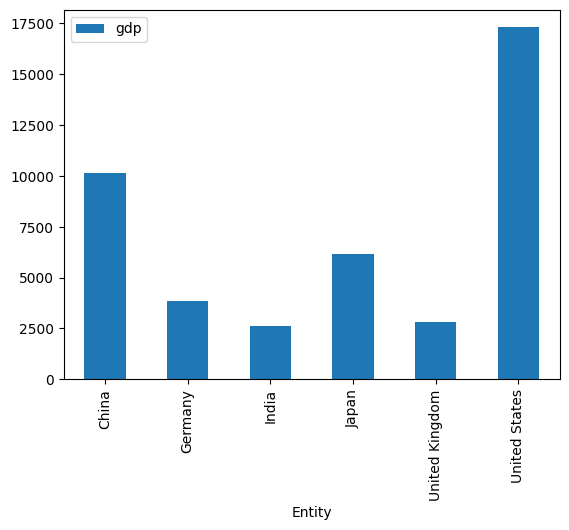

In [ ]:
top6.plot(x="Entity", y="gdp", kind="bar")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'United States')])

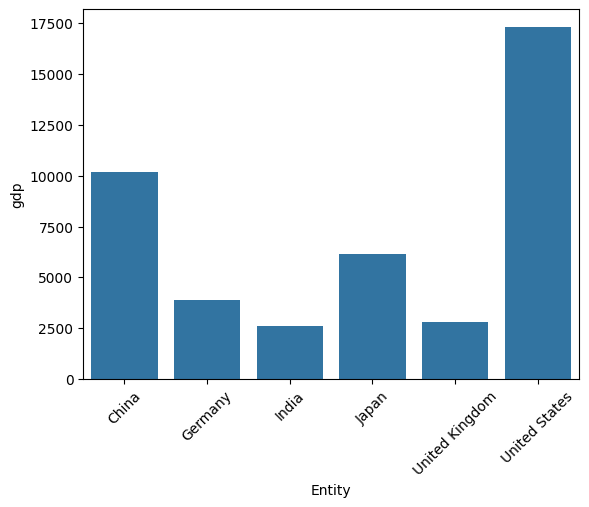

In [ ]:
sns.barplot(data=top6, x="Entity", y="gdp")
plt.xticks(rotation=45)

In [ ]:
import plotly.express as px
fig = px.bar(top6, x="Entity", y="gdp", color="Entity", title="My Cool Plot")
fig.show()

In [ ]:
titanic = sns.load_dataset('titanic')
titanic_class = titanic.groupby("class").count()
fig = px.bar(x=titanic_class.index.categories, y=titanic_class.survived, title="Count by Class on the Titanic")
fig.update_layout(autosize=False, width=1000, height=500)
fig.show()

In [ ]:
fig = px.histogram(titanic, x="fare", title="Histogram of Fares on the Titanic", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(xaxis_title="Fare")
fig.show()

In [ ]:
fig = px.histogram(titanic, x="age", color="survived", title="Histogram of Ages by Survival")
fig.update_layout(xaxis_title="Age")
fig.show()